# <span style="color:blue">Lab Case Study - Auto Insurance Company</span>

 #### Table of contents
 
 * [Import and concatenate files](#chapter1)
  
 * [Standardizing header names](#chapter2)
  
 * [Deleting rows](#chapter3)
 
 * [Check the data types](#chapter4)
  
 * [Filtering data and Correcting typos](#chapter5)
  
 * [Removing duplicates](#chapter6)
  
 * [Replacing null values](#chapter7)
  
     * [Customer lifetime value](#chapter7_1)
     * [Income](#chapter7_2)
     * [Monthly premium auto](#chapter7_3)
     * [Number of open complaints](#chapter7_4)
     * [Total claim amount](#chapter7_5)
      
 * [Bucketing the data](#chapter8)
  
 * [Standardizing the data](#chapter9)
  
 * [Data types - Numerical or Categorical?](#chapter10)
  
  
 #### Using Data of Data_Marketing_Customer_Analysis_Round2.csv  
  
  
 * [New information on response and sales channel](#chapter11)
  
 * [Data Visualization](#chapter12)
  
    * [Plot of the total number of responses](#chapter12_1)
    * [Plot of the response rate by the sales channel](#chapter12_2)
    * [Plot of the response rate by the total claim amount](#chapter12_3)
    * [Plot of the response rate by the income](#chapter12_4)
    * [Heatmap](#chapter12_5)  
      
 * [Rechecking and sorting numerical and categorical data](#chapter13)
   
 * [Checking for normal distribution](#chapter14)
   
 * [Multicollinearity](#chapter15)
     * [Highly Correlated Columns](#chapter15_1)
 
 * [Data Transformation](#chapter16)
 
     * [Hot coding Categorical Variables](#chapter16_1)
     
     
     * [X Y split](#chapter16_2)
     * [Data Splitting](#chapter16_3)
 
 * [Standardize - using StandardScaler](#chapter17)
 
     * [Apply Linear Regression](#chapter17_1)
     * [Evaluating predictions](#chapter17_2)
     
 * [Using Statsmodels for linear regression mode](#chapter19)
 
 * [Using Seaborn for linear regression model](#chapter20)

In [1995]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1996]:
%config Completer.use_jedi = False

## Import and concatenate files  <a class="anchor" id="chapter1"></a>

In [1997]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3a = pd.read_csv('Data/file3.csv')

In [1998]:
file3=file3a.rename(columns={'State':'ST', 'Gender':'GENDER'})

file3  #renaming column  headers in file3

#data['Gender'] = list(map(lambda x, y: x if x == x else y, data['Gender'],data['GENDER']))

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [1999]:
ai_df = pd.concat([file1,file2,file3], axis=0)  #concatinating file1 + file2 +file3
ai_df_=ai_df.reset_index(drop=True)
ai_df_

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [2000]:
ai_df_.isna().sum()

Customer                     2937
ST                           2937
GENDER                       3059
Education                    2937
Customer Lifetime Value      2944
Income                       2937
Monthly Premium Auto         2937
Number of Open Complaints    2937
Policy Type                  2937
Vehicle Class                2937
Total Claim Amount           2937
dtype: int64

## Standardizing header names <a class="anchor" id="chapter2"></a>

In [2001]:
def lower_case_column_names(ai_df_):          #function to lower column headers
    ai_df_.columns=[i.lower() for i in ai_df_.columns]
    return ai_df_

In [2002]:
lower_case_column_names(ai_df_)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Deleting rows (customer) <a class="anchor" id="chapter3"></a>

In [2003]:
def drop_columns(ai_df_) :                  #funtion to drop customer column
    ai_df_.drop(columns=['customer'], inplace=True)
    return ai_df_

In [2004]:
drop_columns(ai_df_)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Check the data types<a class="anchor" id="chapter4"></a>
    fix customer lifetime value and number of complaints

In [2005]:
ai_df_.dtypes   #see all data types

st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [2006]:
ai_df_['customer lifetime value'] =  pd.to_numeric(ai_df_['customer lifetime value'], errors='coerce')  #set customer lifetime value to numeric
ai_df_['number of open complaints'] =  pd.to_numeric(ai_df_['number of open complaints'], errors='coerce')   #set number of open complaints to numeric

In [2007]:
ai_df_.dtypes #check if all applied

st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

## Filtering data and Correcting typos<a class="anchor" id="chapter5"></a>
        filter the data in state and gender column to standardize the texts in those columns

In [2008]:
print(ai_df_['gender'].unique())   #check for all unique values in gender
ai_df_.gender.value_counts()

[nan 'F' 'M' 'Femal' 'Male' 'female']


F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [2009]:
#ai_df_['gender'].replace(['M', 'MALE'], 'Male') #inplace=True  #attempt to try with replace-function
#ai_df_

In [2010]:
def clean_gender(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['M', 'MALE', 'Male' ]:
        return 'Male'
    elif x.lower().startswith('f'):
        return 'Female'
    else:
        return 'Unkown'
    

In [2011]:
ai_df_['gender'] = list(map(clean_gender, ai_df_['gender'])) 

In [2012]:
print(ai_df_['gender'].unique())
ai_df_.gender.value_counts()

[nan 'Female' 'Male']


Female    4607
Male      4408
Name: gender, dtype: int64

In [2013]:
ai_df_

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [2014]:
print(ai_df_['st'].unique())  #check values for state
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [2015]:
def clean_st(x):
    if x !=x:
        return x
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    
    else:
        return x

In [2016]:
ai_df_['st'] = list(map(clean_st, ai_df_['st']))   #clean/correct st values

In [2017]:
print(ai_df_['st'].unique())     #check st values again
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]


California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

## Removing duplicates<a class="anchor" id="chapter6"></a>

In [2018]:
ai_df_.drop_duplicates()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Replacing null values <a class="anchor" id="chapter7"></a>
    Replace missing values with means of the column (for numerical columns)

### Customer lifetime value <a class="anchor" id="chapter7_1"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 8028.803803165787


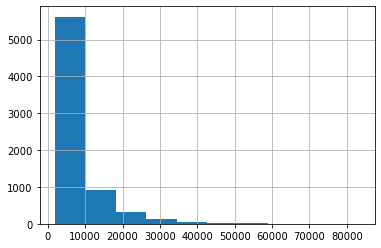

In [2019]:

print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())
#print(ai_df_['customer lifetime value'].unique())
print(ai_df_['customer lifetime value'].hist())

mean_customer_lifetime_value = np.mean(ai_df_['customer lifetime value'])

print('mean:',mean_customer_lifetime_value)

AxesSubplot(0.125,0.125;0.775x0.755)
Number of NaNs: 0


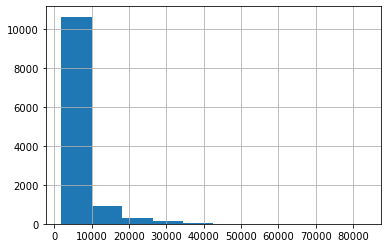

In [2020]:
ai_df_['customer lifetime value'] = ai_df_['customer lifetime value'].fillna(mean_customer_lifetime_value)  #fillna (fill NaN) with mean

print(ai_df_['customer lifetime value'].hist())
print('Number of NaNs:', ai_df_['customer lifetime value'].isna().sum())

### Income <a class="anchor" id="chapter7_2"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 37828.820291124


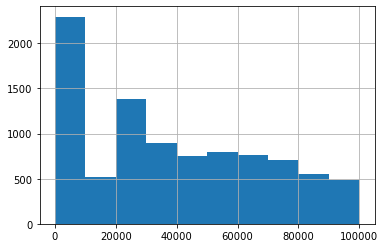

In [2021]:
print('Number of NaNs:', ai_df_['income'].isna().sum())
#print(ai_df_['income'].unique())
print(ai_df_['income'].hist())

mean_income = np.mean(ai_df_['income'])

print('mean:', mean_income)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


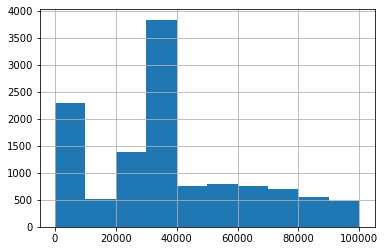

In [2022]:
ai_df_['income'] = ai_df_['income'].fillna(mean_income)

print('Number of NaNs:', ai_df_['income'].isna().sum())
print(ai_df_['income'].hist())

### Monthly premium auto <a class="anchor" id="chapter7_3"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 110.3912662799606


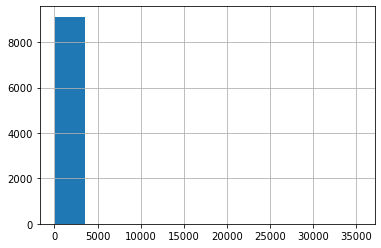

In [2023]:
print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
#print(ai_df_['monthly premium auto'].unique()) 
print(ai_df_['monthly premium auto'].hist())    #outlier: 35353.0

mean_monthly_premium_auto = np.mean(ai_df_['monthly premium auto'])

print('mean:', mean_monthly_premium_auto)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


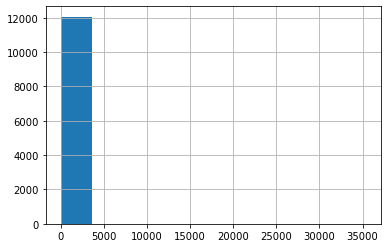

In [2024]:
ai_df_['monthly premium auto'] = ai_df_['monthly premium auto'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['monthly premium auto'].isna().sum())
print(ai_df_['monthly premium auto'].hist())

### Number of open complaints <a class="anchor" id="chapter7_4"></a>

Number of NaNs: 5004
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 0.384


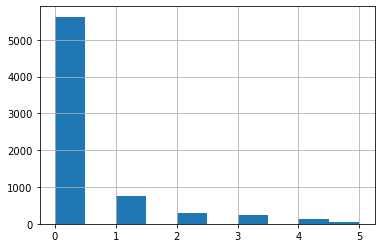

In [2025]:
print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
#print(ai_df_['number of open complaints'].unique())
print(ai_df_['number of open complaints'].hist())

mean_number_of_open_complaints = round(np.mean(ai_df_['number of open complaints']), 3)
print('mean:',mean_number_of_open_complaints)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


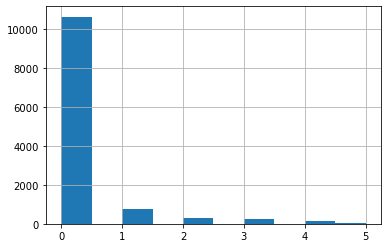

In [2026]:
ai_df_['number of open complaints'] = ai_df_['number of open complaints'].fillna(mean_number_of_open_complaints)

print('Number of NaNs:', ai_df_['number of open complaints'].isna().sum())
print(ai_df_['number of open complaints'].hist())

### Total claim amount <a class="anchor" id="chapter7_5"></a>

Number of NaNs: 2937
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 430.5271400681818


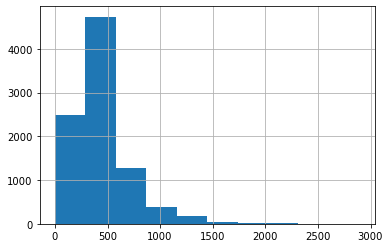

In [2027]:
print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
#print(ai_df_['total claim amount'].unique())
print(ai_df_['total claim amount'].hist())

mean_total_claim_amount = np.mean(ai_df_['total claim amount'])
print('mean:',mean_total_claim_amount)

Number of NaNs: 0
AxesSubplot(0.125,0.125;0.775x0.755)


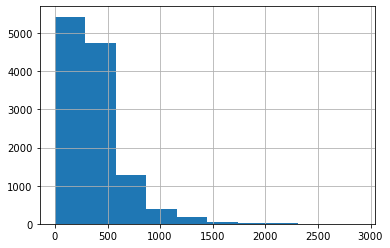

In [2028]:
ai_df_['total claim amount'] = ai_df_['total claim amount'].fillna(mean_monthly_premium_auto)

print('Number of NaNs:', ai_df_['total claim amount'].isna().sum())
print(ai_df_['total claim amount'].hist())

#### Check in complete data for NaN

In [2029]:
ai_df_.isna().sum()   #check for count of NaN values

st                           2937
gender                       3059
education                    2937
customer lifetime value         0
income                          0
monthly premium auto            0
number of open complaints       0
policy type                  2937
vehicle class                2937
total claim amount              0
dtype: int64

In [2030]:
ai_df_.describe()  #check for data stats

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000
mean,8028.803803,37828.820291,110.391266,0.384176,352.654102
std,5312.295534,26409.114946,505.740308,0.700656,286.924004
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,5279.143178,21585.250000,71.000000,0.000000,110.391266
50%,8028.803803,37828.820291,101.000000,0.384000,312.000000
75%,8028.803803,53301.750000,110.391266,0.384000,494.345486
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


## Bucketing the data<a class="anchor" id="chapter8"></a>
    Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

<AxesSubplot:>

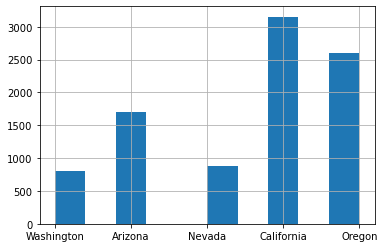

In [2031]:
ai_df_.st.hist() 

In [2032]:
def bucket_st(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['California', 'West Region']:
        return 'West Region'
    elif x in ['Oregon', 'North West']:
        return 'North West'
    elif x in ['Washington', 'East']:
        return 'East'
    elif x in ['Arizona','Nevada', 'Central']:
        return 'Central'
    else:
        return 'Other'
    

In [2033]:
ai_df_['st binned'] = ai_df_['st'].apply(bucket_st)  #apply function on data 'st' to group into 'st binned' (new column)


# sort columns
ai_df_=ai_df_[['st', 'st binned','gender', 'education', 'income', 'policy type', 'vehicle class','customer lifetime value', 'monthly premium auto', 'number of open complaints', 'total claim amount']]
ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,Washington,East,NaN,Master,0.0,Personal Auto,Four-Door Car,8028.803803,1000.0,0.384,2.704934
1,Arizona,Central,Female,Bachelor,0.0,Personal Auto,Four-Door Car,8028.803803,94.0,0.384,1131.464935
2,Nevada,Central,Female,Bachelor,48767.0,Personal Auto,Two-Door Car,8028.803803,108.0,0.384,566.472247
3,California,West Region,Male,Bachelor,0.0,Corporate Auto,SUV,8028.803803,106.0,0.384,529.881344
4,Washington,East,Male,High School or Below,36357.0,Personal Auto,Four-Door Car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,California,West Region,Male,Bachelor,71941.0,Personal Auto,Four-Door Car,23405.987980,73.0,0.000,198.234764
12070,California,West Region,Female,College,21604.0,Corporate Auto,Four-Door Car,3096.511217,79.0,0.000,379.200000
12071,California,West Region,Male,Bachelor,0.0,Corporate Auto,Four-Door Car,8163.890428,85.0,3.000,790.784983
12072,California,West Region,Male,College,21941.0,Personal Auto,Four-Door Car,7524.442436,96.0,0.000,691.200000


## Standardizing the data<a class="anchor" id="chapter9"></a>
    Use string functions to standardize the text data (lower case)

In [2034]:
ai_df_.dtypes  ##checking which data types are strings

st                            object
st binned                     object
gender                        object
education                     object
income                       float64
policy type                   object
vehicle class                 object
customer lifetime value      float64
monthly premium auto         float64
number of open complaints    float64
total claim amount           float64
dtype: object

In [2035]:
##setting all string data columns lower case

for col in ['st', 'st binned', 'gender','education', 'policy type', 'vehicle class']:
    ai_df_[col]=ai_df_[col].str.lower()


#ai_df_['st']=ai_df_['st'].str.lower()
#ai_df_['st binned'].str.lower().inplace=True
#ai_df_['gender'].str.lower()
#ai_df_['education'].str.lower()
#ai_df_['policy type'].str.lower()
#ai_df_['vehicle class'].str.lower()

ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,washington,east,NaN,master,0.0,personal auto,four-door car,8028.803803,1000.0,0.384,2.704934
1,arizona,central,female,bachelor,0.0,personal auto,four-door car,8028.803803,94.0,0.384,1131.464935
2,nevada,central,female,bachelor,48767.0,personal auto,two-door car,8028.803803,108.0,0.384,566.472247
3,california,west region,male,bachelor,0.0,corporate auto,suv,8028.803803,106.0,0.384,529.881344
4,washington,east,male,high school or below,36357.0,personal auto,four-door car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,california,west region,male,bachelor,71941.0,personal auto,four-door car,23405.987980,73.0,0.000,198.234764
12070,california,west region,female,college,21604.0,corporate auto,four-door car,3096.511217,79.0,0.000,379.200000
12071,california,west region,male,bachelor,0.0,corporate auto,four-door car,8163.890428,85.0,3.000,790.784983
12072,california,west region,male,college,21941.0,personal auto,four-door car,7524.442436,96.0,0.000,691.200000


## Data types - Numerical or Categorical?<a class="anchor" id="chapter10"></a>

In [2036]:
ai_df_numeric = ai_df_._get_numeric_data()

In [2037]:
list(ai_df_numeric)

['income',
 'customer lifetime value',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount']

In [2038]:
ai_df_categoric = [col for col in ai_df_.columns if ai_df_[col].dtype=="O"]

In [2039]:
list(ai_df_categoric)

['st', 'st binned', 'gender', 'education', 'policy type', 'vehicle class']

## New information on response and sales channel<a class="anchor" id="chapter11"></a>

In [2040]:
new_df_= pd.read_csv('Data\Data_Marketing_Customer_Analysis_Round2.csv')

In [2041]:
new_df=new_df_.reset_index(drop=True)
new_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [2042]:
def drop_columns(new_df) :                  #funtion to drop customer column
    new_df.drop(columns=['Customer'], inplace=True)
    return new_df

In [2043]:
new_df=drop_columns(new_df)

In [2044]:
def drop_columns(new_df) :                  #funtion to unnamed customer column
    new_df.drop(columns=['Unnamed: 0'], inplace=True)
    return new_df

In [2045]:
new_df=drop_columns(new_df)

In [2046]:
##setting all string data columns lower case

for col in ['State', 'Gender','Education', 'Policy Type', 'Vehicle Class', 'Sales Channel', 'Response', 'Coverage','EmploymentStatus','Vehicle Size','Vehicle Type' ]:
    new_df[col]=new_df[col].str.lower()

new_df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,arizona,4809.216960,no,basic,college,2/18/11,employed,m,48029,Suburban,...,0.0,9,corporate auto,Corporate L3,Offer3,agent,292.800000,four-door car,medsize,NaN
1,california,2228.525238,no,basic,college,1/18/11,unemployed,f,0,Suburban,...,0.0,1,personal auto,Personal L3,Offer4,call center,744.924331,four-door car,medsize,NaN
2,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,Suburban,...,0.0,2,personal auto,Personal L3,Offer3,call center,480.000000,suv,medsize,a
3,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,49078,Suburban,...,0.0,2,corporate auto,Corporate L3,Offer2,branch,484.013411,four-door car,medsize,a
4,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,Suburban,...,NaN,7,personal auto,Personal L2,Offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,Suburban,...,NaN,7,personal auto,Personal L1,Offer3,web,1214.400000,luxury car,medsize,a
10906,oregon,5259.444853,no,basic,college,1/6/11,employed,f,61146,Urban,...,0.0,6,personal auto,Personal L3,Offer2,branch,273.018929,four-door car,medsize,a
10907,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,Rural,...,0.0,2,corporate auto,Corporate L3,Offer1,web,381.306996,luxury suv,medsize,NaN
10908,california,11971.977650,no,premium,college,2/13/11,employed,f,64195,Urban,...,4.0,6,personal auto,Personal L1,Offer1,branch,618.288849,suv,medsize,a


In [2047]:
def lower_case_column_names(new_df):          #function to lower column headers
    new_df.columns=[i.lower() for i in new_df.columns]
    return new_df

In [2048]:
lower_case_column_names(new_df)

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,arizona,4809.216960,no,basic,college,2/18/11,employed,m,48029,Suburban,...,0.0,9,corporate auto,Corporate L3,Offer3,agent,292.800000,four-door car,medsize,NaN
1,california,2228.525238,no,basic,college,1/18/11,unemployed,f,0,Suburban,...,0.0,1,personal auto,Personal L3,Offer4,call center,744.924331,four-door car,medsize,NaN
2,washington,14947.917300,no,basic,bachelor,2/10/11,employed,m,22139,Suburban,...,0.0,2,personal auto,Personal L3,Offer3,call center,480.000000,suv,medsize,a
3,oregon,22332.439460,yes,extended,college,1/11/11,employed,m,49078,Suburban,...,0.0,2,corporate auto,Corporate L3,Offer2,branch,484.013411,four-door car,medsize,a
4,oregon,9025.067525,no,premium,bachelor,1/17/11,medical leave,f,23675,Suburban,...,NaN,7,personal auto,Personal L2,Offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,no,premium,bachelor,1/19/11,unemployed,f,0,Suburban,...,NaN,7,personal auto,Personal L1,Offer3,web,1214.400000,luxury car,medsize,a
10906,oregon,5259.444853,no,basic,college,1/6/11,employed,f,61146,Urban,...,0.0,6,personal auto,Personal L3,Offer2,branch,273.018929,four-door car,medsize,a
10907,arizona,23893.304100,no,extended,bachelor,2/6/11,employed,f,39837,Rural,...,0.0,2,corporate auto,Corporate L3,Offer1,web,381.306996,luxury suv,medsize,NaN
10908,california,11971.977650,no,premium,college,2/13/11,employed,f,64195,Urban,...,4.0,6,personal auto,Personal L1,Offer1,branch,618.288849,suv,medsize,a


In [2049]:
new_df.dtypes 

state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type                      object
dtype: object

## Data Visualization<a class="anchor" id="chapter12"></a>

In [2050]:
# import libraries to visualize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Plot of the total number of responses <a class="anchor" id="chapter12_1"></a>

[Text(0, 0.5, 'Count of (non)response')]

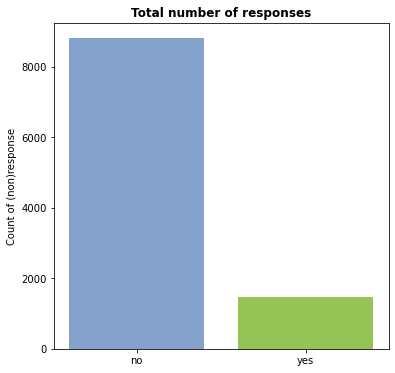

In [2051]:
responded = new_df['response'].value_counts()
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

# create figure and axes
fig1, ax1 = plt.subplots(1,1,figsize = (6,6))

# set title
ax1.set_title('Total number of responses', fontweight='bold')

# plot the bar chart
ax1.bar(responded.index, responded, color=('#85a2cc','#96c355'))

ax1.set(ylabel='Count of (non)response')


C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='response', ylabel='count'>

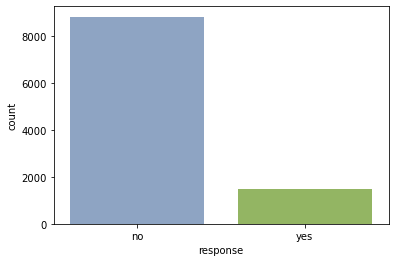

In [2052]:
#sns.countplot(new_df, x='response', palette=palette1, hue='sales channel')

sns.countplot(new_df.response, palette=palette1) ##optional plot

### Plot of the response rate by the sales channel <a class="anchor" id="chapter12_2"></a>

In [2053]:
new_df['response2'] = new_df['response'] #duplicate response column (QUESTION:any possibility to do without?)

channel_response = new_df.groupby(['sales channel','response2'])['response'].count().reset_index()
channel_response

,sales channel,response2,response
0,agent,no,3148
1,agent,yes,742
2,branch,no,2539
3,branch,yes,326
4,call center,no,1792
5,call center,yes,221
6,web,no,1334
7,web,yes,177


C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:title={'center':'Response Rate by sales channel'}, xlabel='sales channel', ylabel='response'>

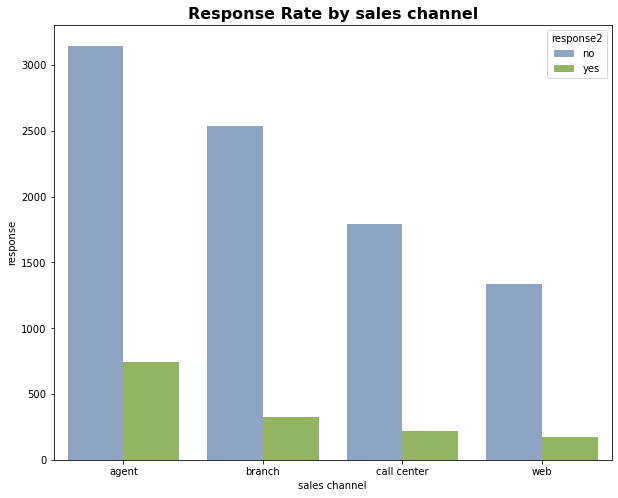

In [2054]:
#set the color palette, which means that a preset palette of colors will be used in the upcoming graphs
palette1 = {"yes": "#96c355", "no": "#85a2cc"}

fig2, ax2 = plt.subplots(figsize = (10,8))
ax2.set_title('Response Rate by sales channel', size='16', fontweight='bold')

sns.barplot(x = channel_response['sales channel'],y = channel_response['response'], hue = channel_response['response2'], ax = ax2, orient='v',palette=palette1)
## hue - adding 3rd dimension (without only one bar per x-value)

C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


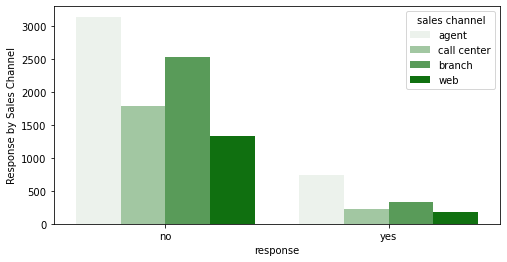

In [2055]:
###other option to do plot response rate by sales channel
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales channel', data=new_df, color='green')
plt.ylabel('Response by Sales Channel')
plt.show()

### Plot of the response rate by the total claim amount <a class="anchor" id="chapter12_3"></a>

In [2056]:

#response_yes=[new_df[new_df['response'] == 'yes']]  #filtering data for response yes

#distribution plot, rain cloud plot 

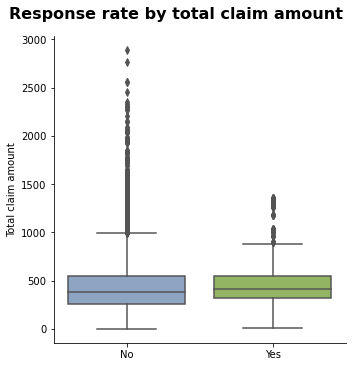

In [2057]:
fg3 = sns.catplot(x='response', y = 'total claim amount', data = new_df,  kind="box", palette=palette1)
fg3.fig.suptitle('Response rate by total claim amount', size='16', fontweight='bold', y = 1.05)
fg3.set_xticklabels(['No', 'Yes'])
fg3.set_ylabels('Total claim amount')
fg3.set_xlabels('')

### Plot of the response rate by income <a class="anchor" id="chapter12_4"></a>

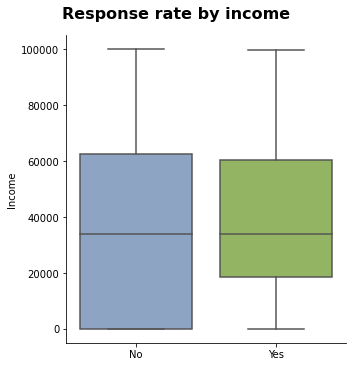

In [2058]:
fg4 = sns.catplot(x='response', y = 'income', data = new_df,  kind="box", palette=palette1)
fg4.fig.suptitle('Response rate by income', size='16', fontweight='bold', y = 1.05)
fg4.set_xticklabels(['No', 'Yes'])
fg4.set_ylabels('Income')
fg4.set_xlabels('')

### Correlation Heatmap <a class="anchor" id="chapter12_5"></a>

<AxesSubplot:>

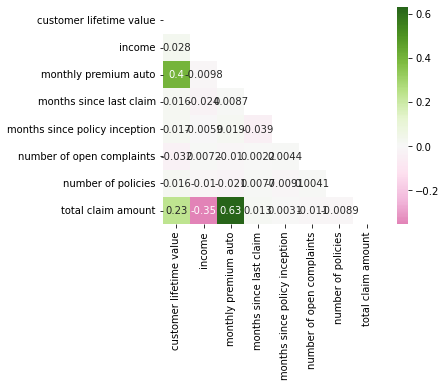

In [2059]:
corr = new_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap="PiYG", mask=mask, square=True, center=0)

In [2060]:

corr.to_csv("heatmap_data.csv")

## Rechecking and sorting numerical and categorical data<a class="anchor" id="chapter13"></a>

In [2061]:
new_df_numeric = new_df._get_numeric_data()
#list(new_df_numeric)
new_df_numeric

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [2062]:
def drop_columns(new_df_numeric) :                  
    new_df_numeric.drop(columns=['number of open complaints'], inplace=True)
    return new_df_numeric

In [2063]:
drop_columns(new_df_numeric)  ##delete 'number of open complaints' from numeric dataset, as it's ordinal, categorical data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,9,292.800000
1,2228.525238,0,64,3.0,26,1,744.924331
2,14947.917300,22139,100,34.0,31,2,480.000000
3,22332.439460,49078,97,10.0,3,2,484.013411
4,9025.067525,23675,117,NaN,31,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,7,1214.400000
10906,5259.444853,61146,65,7.0,68,6,273.018929
10907,23893.304100,39837,201,11.0,63,2,381.306996
10908,11971.977650,64195,158,0.0,27,6,618.288849


In [2064]:
new_df_categoric = [col for col in new_df.columns if new_df[col].dtype=="object"]

new_df_categorical=new_df[new_df_categoric]
new_df_categorical

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,response2
0,arizona,no,basic,college,2/18/11,employed,m,Suburban,Married,corporate auto,Corporate L3,Offer3,agent,four-door car,medsize,NaN,no
1,california,no,basic,college,1/18/11,unemployed,f,Suburban,Single,personal auto,Personal L3,Offer4,call center,four-door car,medsize,NaN,no
2,washington,no,basic,bachelor,2/10/11,employed,m,Suburban,Single,personal auto,Personal L3,Offer3,call center,suv,medsize,a,no
3,oregon,yes,extended,college,1/11/11,employed,m,Suburban,Single,corporate auto,Corporate L3,Offer2,branch,four-door car,medsize,a,yes
4,oregon,no,premium,bachelor,1/17/11,medical leave,f,Suburban,Married,personal auto,Personal L2,Offer1,branch,four-door car,medsize,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,no,premium,bachelor,1/19/11,unemployed,f,Suburban,Married,personal auto,Personal L1,Offer3,web,luxury car,medsize,a,no
10906,oregon,no,basic,college,1/6/11,employed,f,Urban,Married,personal auto,Personal L3,Offer2,branch,four-door car,medsize,a,no
10907,arizona,no,extended,bachelor,2/6/11,employed,f,Rural,Married,corporate auto,Corporate L3,Offer1,web,luxury suv,medsize,NaN,no
10908,california,no,premium,college,2/13/11,employed,f,Urban,Divorced,personal auto,Personal L1,Offer1,branch,suv,medsize,a,no


In [2065]:
new_df_categorical=pd.concat([new_df_categorical, new_df['number of open complaints']], axis = 1)

In [2066]:
new_df_categorical['number of open complaints']=new_df_categorical['number of open complaints'].apply(str)

In [2067]:
new_df_categorical.dtypes

state                        object
response                     object
coverage                     object
education                    object
effective to date            object
employmentstatus             object
gender                       object
location code                object
marital status               object
policy type                  object
policy                       object
renew offer type             object
sales channel                object
vehicle class                object
vehicle size                 object
vehicle type                 object
response2                    object
number of open complaints    object
dtype: object

In [2068]:
print(new_df['number of open complaints'].unique()) 

[ 0. nan  3.  1.  2.  4.  5.]


In [2069]:
#funtion to drop 'response 2' column
def drop_columns(new_df_categorical) :                  
    new_df_categorical.drop(columns=['response2'], inplace=True)
    return new_df_categorical

In [2070]:
drop_columns(new_df_categorical) 

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type,number of open complaints
0,arizona,no,basic,college,2/18/11,employed,m,Suburban,Married,corporate auto,Corporate L3,Offer3,agent,four-door car,medsize,NaN,0.0
1,california,no,basic,college,1/18/11,unemployed,f,Suburban,Single,personal auto,Personal L3,Offer4,call center,four-door car,medsize,NaN,0.0
2,washington,no,basic,bachelor,2/10/11,employed,m,Suburban,Single,personal auto,Personal L3,Offer3,call center,suv,medsize,a,0.0
3,oregon,yes,extended,college,1/11/11,employed,m,Suburban,Single,corporate auto,Corporate L3,Offer2,branch,four-door car,medsize,a,0.0
4,oregon,no,premium,bachelor,1/17/11,medical leave,f,Suburban,Married,personal auto,Personal L2,Offer1,branch,four-door car,medsize,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,no,premium,bachelor,1/19/11,unemployed,f,Suburban,Married,personal auto,Personal L1,Offer3,web,luxury car,medsize,a,nan
10906,oregon,no,basic,college,1/6/11,employed,f,Urban,Married,personal auto,Personal L3,Offer2,branch,four-door car,medsize,a,0.0
10907,arizona,no,extended,bachelor,2/6/11,employed,f,Rural,Married,corporate auto,Corporate L3,Offer1,web,luxury suv,medsize,NaN,0.0
10908,california,no,premium,college,2/13/11,employed,f,Urban,Divorced,personal auto,Personal L1,Offer1,branch,suv,medsize,a,4.0


In [2071]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,9,292.800000
1,2228.525238,0,64,3.0,26,1,744.924331
2,14947.917300,22139,100,34.0,31,2,480.000000
3,22332.439460,49078,97,10.0,3,2,484.013411
4,9025.067525,23675,117,NaN,31,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,7,1214.400000
10906,5259.444853,61146,65,7.0,68,6,273.018929
10907,23893.304100,39837,201,11.0,63,2,381.306996
10908,11971.977650,64195,158,0.0,27,6,618.288849


## Checking for normal distribution<a class="anchor" id="chapter14"></a>

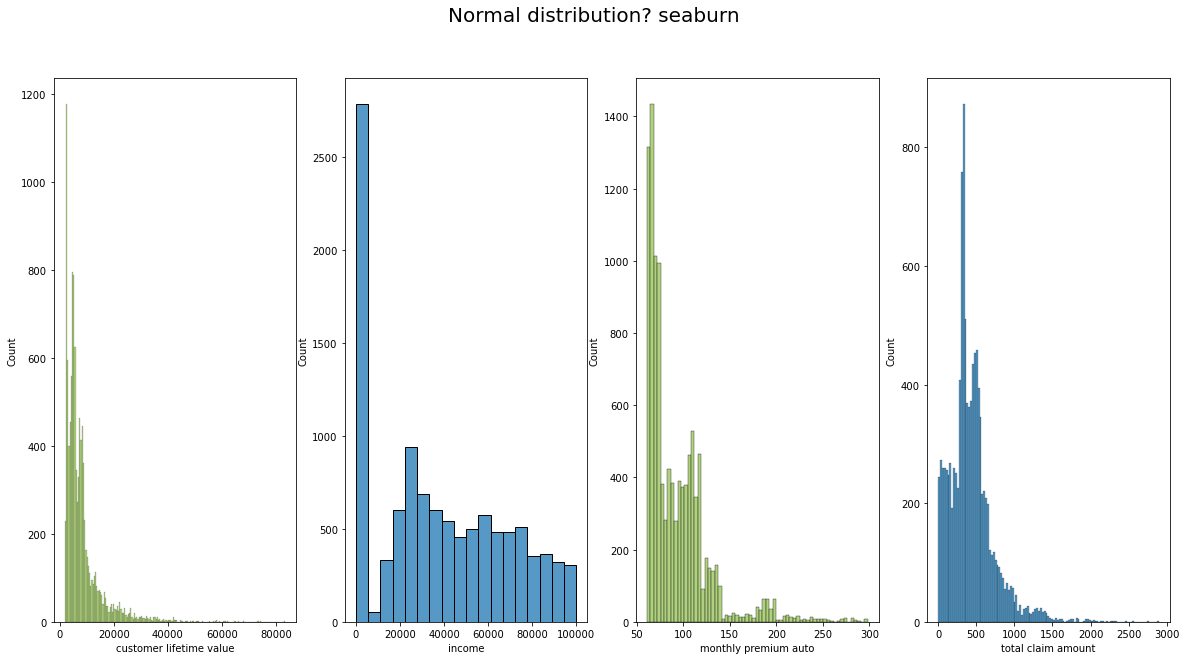

In [2072]:
# create the figure and axes
fig5,axes5 = plt.subplots(1,4,figsize = (20,10))


fig5.suptitle('Normal distribution? seaburn', fontsize=20)

# use sns.histplot as distplot will replaced
fg5 = sns.histplot(new_df_numeric['customer lifetime value'], ax=axes5[0], color="#96c355")
fg5 = sns.histplot(new_df_numeric['income'], ax=axes5[1])
fg5 = sns.histplot(new_df_numeric['monthly premium auto'], ax=axes5[2], color="#96c355")
#fg5 = sns.histplot(new_df_numeric['number of open complaints'], ax=axes5[1,0])
fg5 = sns.histplot(new_df_numeric['total claim amount'], ax=axes5[3])

Text(0.5, 1.0, 'Histogram of customer lifetime value')

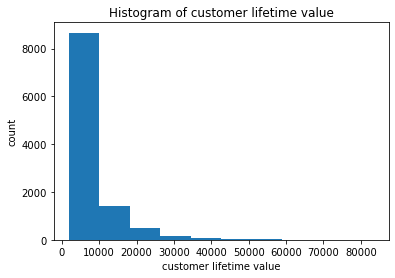

In [2073]:
# use matplotlib.pyplot.hist      (QUESTION: Is there a way of also displaying plt.histo on a canvas (as above)?)
fig6=plt.hist(new_df_numeric['customer lifetime value'], label='customer lifetime value')
plt.xlabel('customer lifetime value')
plt.ylabel('count')
plt.title('Histogram of customer lifetime value')

Text(0.5, 1.0, 'Histogram of income')

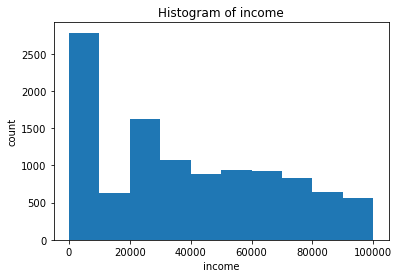

In [2074]:
fig7 = plt.hist(new_df_numeric['income'], label='income')
plt.xlabel('income')
plt.ylabel('count')
plt.title('Histogram of income')

Text(0.5, 1.0, 'Histogram of monthly premium auto')

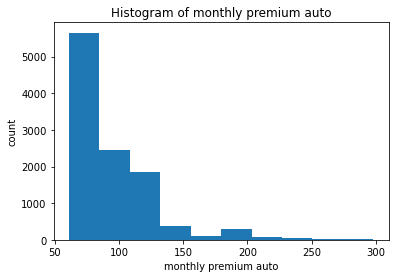

In [2075]:
fig8 = plt.hist(new_df_numeric['monthly premium auto'], label='monthly premium auto')
plt.xlabel('monthly premium auto')
plt.ylabel('count')
plt.title('Histogram of monthly premium auto')

Text(0.5, 1.0, 'Histogram of total claim amount')

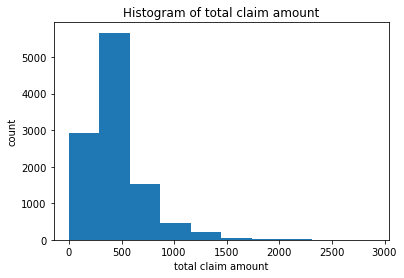

In [2076]:
fig10 = plt.hist(new_df_numeric['total claim amount'], label='total claim amount')
plt.xlabel('total claim amount')
plt.ylabel('count')
plt.title('Histogram of total claim amount')

## Multicollinearity<a class="anchor" id="chapter15"></a>

- increasing Multicollinearity leads to:
    + instability of the models estimation of regression coefficiants
    + hence the asseritions of the regression coefficient will be increasingly inaccurate
    + an unambiguous model interpretation      

In [2077]:
#sns.pairplot(new_df_numeric) 

import IPython
url = "https://c.tenor.com/wT6b-wB22RYAAAAC/dave-grohl-wine.gif"
#src= "Data/dave-grohl-wine.gif"
iframe = '<iframe src=' + url + ' width=260 height=200></iframe>'
IPython.display.HTML(iframe)

### Highly Correlated Columns<a class="anchor" id="chapter15_1"></a>

In [2078]:
corr_matrix=new_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.60)] ##should be 0.8

['total claim amount']

## Data Transformation<a class="anchor" id="chapter16"></a>

### Hot coding Categorical Variables<a class="anchor" id="chapter16_1"></a>

In [2079]:
# get dummies pandas (create needed new column(names))
categoricals_features=pd.get_dummies(new_df_categorical, drop_first=True)


#pd.DataFrame(OneHotEncoder(drop='first').fit_transform(new_df_categoric).toarray(),
#columns=OneHotEncoder(drop='first').fit(new_df_categoric).get_feature_names(input_features=new_df_categoric.columns)).head()

In [2080]:
categoricals_features

,state_california,state_nevada,state_oregon,state_washington,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,...,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10906,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10907,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10908,1,0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,0,1,0,0


### Setting up Dataset for prediction model<a class="anchor" id="chapter16_2"></a>

adding (i.e. categorical) or dropping columns for a higher correlation of the model

In [2081]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


In [2082]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,9,292.800000
1,2228.525238,0,64,3.0,26,1,744.924331
2,14947.917300,22139,100,34.0,31,2,480.000000
3,22332.439460,49078,97,10.0,3,2,484.013411
4,9025.067525,23675,117,NaN,31,7,707.925645
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,7,1214.400000
10906,5259.444853,61146,65,7.0,68,6,273.018929
10907,23893.304100,39837,201,11.0,63,2,381.306996
10908,11971.977650,64195,158,0.0,27,6,618.288849


In [2083]:
new_df_numeric=pd.concat([new_df_numeric, categoricals_features], axis=1)

new_df_numeric=pd.concat([new_df_numeric, categoricals_features['vehicle class_suv'], categoricals_features['vehicle class_two-door car'], categoricals_features['vehicle size_medsize'], categoricals_features['vehicle size_small']], axis = 1)

def drop_columns(new_df_numeric) :                  #not significant and contains NaNs
    new_df_numeric.drop(columns=['months since last claim'], inplace=True)
    return new_df_numeric

new_df_numeric=drop_columns(new_df_numeric)         #not significant

instead of dropping months since last claim, replace NaNs by mean

In [2084]:
print('Number of NaNs:', new_df_numeric['months since last claim'].isna().sum())

mean_months_since_last_claim = np.mean(new_df_numeric['months since last claim'])

print('mean:', mean_months_since_last_claim)

Number of NaNs: 633
mean: 15.149070740488469


In [2085]:
new_df_numeric['months since last claim'] = new_df_numeric['months since last claim'].fillna(mean_months_since_last_claim)

print('Number of NaNs:', new_df_numeric['months since last claim'].isna().sum())


Number of NaNs: 0


In [2086]:
def drop_columns(new_df_numeric) :                 
    new_df_numeric.drop(columns=['months since policy inception'], inplace=True)
    return new_df_numeric

In [2087]:
new_df_numeric=drop_columns(new_df_numeric)

def drop_columns(new_df_numeric) :                  #not significant
    new_df_numeric.drop(columns=['vehicle class_two-door car'], inplace=True)
    return new_df_numeric

new_df_numeric=drop_columns(new_df_numeric)

In [2088]:
def drop_columns(new_df_numeric) :                  #not significant
    new_df_numeric.drop(columns=['number of policies'], inplace=True)
    return new_df_numeric

In [2089]:
new_df_numeric=drop_columns(new_df_numeric)

In [2090]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,months since last claim,total claim amount,state_california,state_nevada,state_oregon,state_washington,response_yes,...,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
0,4809.216960,48029,61,7.000000,292.800000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2228.525238,0,64,3.000000,744.924331,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14947.917300,22139,100,34.000000,480.000000,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,22332.439460,49078,97,10.000000,484.013411,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,9025.067525,23675,117,15.149071,707.925645,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,1214.400000,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10906,5259.444853,61146,65,7.000000,273.018929,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10907,23893.304100,39837,201,11.000000,381.306996,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10908,11971.977650,64195,158,0.000000,618.288849,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


### Removing outliers<a class="anchor" id="chapter16_3"></a>

####  Customer life time value

sns.boxplot(new_df_numeric['monthly premium auto'])

C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer lifetime value'>

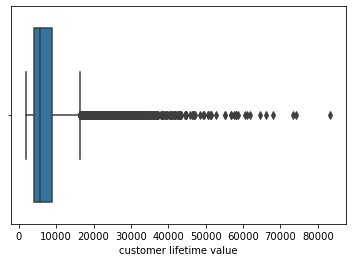

In [2091]:
sns.boxplot(new_df_numeric['customer lifetime value'])

In [2092]:
Q1 = new_df_numeric['customer lifetime value'].quantile(0.25)
Q3 = new_df_numeric['customer lifetime value'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.

In [2093]:
filter = (new_df_numeric['customer lifetime value'] >= Q1 - 1.5 * IQR) & (new_df_numeric['customer lifetime value'] <= Q3 + 1.5 *IQR)
new_df_numeric=new_df_numeric.loc[filter] 

#### Monthly Premium Auto

C:\Users\ingae\anaconda3\envs\DA_Envi_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='monthly premium auto'>

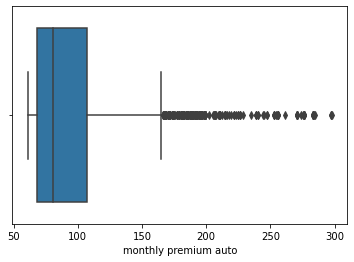

In [2094]:
sns.boxplot(new_df_numeric['monthly premium auto'])

In [2095]:
Q1 = new_df_numeric['monthly premium auto'].quantile(0.25)
Q3 = new_df_numeric['monthly premium auto'].quantile(0.75)
IQR = Q3 - Q1
IQR

39.0

In [2096]:
filter = (new_df_numeric['monthly premium auto'] >= Q1 - 1.5 * IQR) & (new_df_numeric['monthly premium auto'] <= Q3 + 1.5 *IQR)
new_df_numeric=new_df_numeric.loc[filter] 

In [2097]:
new_df_numeric

,customer lifetime value,income,monthly premium auto,months since last claim,total claim amount,state_california,state_nevada,state_oregon,state_washington,response_yes,...,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
0,4809.216960,48029,61,7.000000,292.800000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2228.525238,0,64,3.000000,744.924331,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14947.917300,22139,100,34.000000,480.000000,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,9025.067525,23675,117,15.149071,707.925645,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5,4745.181764,50549,61,2.000000,292.800000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,3579.023825,28304,91,10.000000,655.200000,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
10903,2771.663013,59855,74,30.000000,355.200000,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
10906,5259.444853,61146,65,7.000000,273.018929,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10908,11971.977650,64195,158,0.000000,618.288849,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


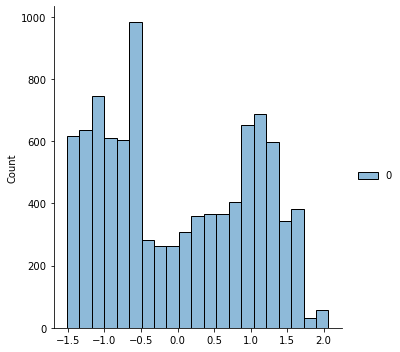

In [2098]:
pt = PowerTransformer()
monthly_premium_auto_transformed=pt.fit_transform(new_df_numeric['monthly premium auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)

<AxesSubplot:ylabel='Count'>

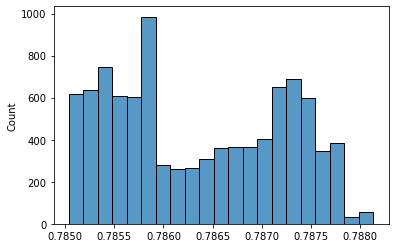

In [2099]:
monthly_premium_auto_transformed,lam=boxcox(new_df_numeric['monthly premium auto'])
sns.histplot(monthly_premium_auto_transformed)

<AxesSubplot:xlabel='monthly premium auto', ylabel='total claim amount'>

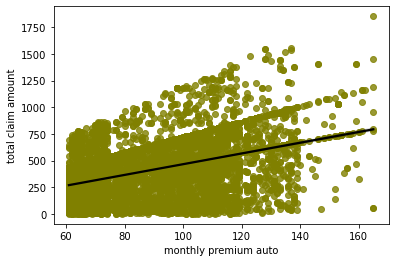

In [2100]:
sns.regplot(x='monthly premium auto',y='total claim amount', data=new_df_numeric, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

### Predictive Modeling: X Y split<a class="anchor" id="chapter16_4"></a>

X Y-split to seperate independent from dependent data

In [2101]:
X=new_df_numeric.drop('total claim amount', axis=1) #independent/explanatory variables
y=new_df_numeric['total claim amount']   #target/dependend/explained variable (which shell be predicted)

In [2102]:
X=X._get_numeric_data()
X

,customer lifetime value,income,monthly premium auto,months since last claim,state_california,state_nevada,state_oregon,state_washington,response_yes,coverage_extended,...,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
0,4809.216960,48029,61,7.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2228.525238,0,64,3.000000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14947.917300,22139,100,34.000000,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,9025.067525,23675,117,15.149071,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,4745.181764,50549,61,2.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,3579.023825,28304,91,10.000000,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
10903,2771.663013,59855,74,30.000000,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
10906,5259.444853,61146,65,7.000000,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10908,11971.977650,64195,158,0.000000,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [2103]:
#X.hist(figsize=(14,14))

### Data Splitting <a class="anchor" id="chapter16_5"></a>

In [2132]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=36)  #test_set ca. 20% of whole data

In [2133]:
X_train

,customer lifetime value,income,monthly premium auto,months since last claim,state_california,state_nevada,state_oregon,state_washington,response_yes,coverage_extended,...,vehicle class_suv,vehicle class_two-door car,vehicle size_medsize,vehicle size_small,number of open complaints_1.0,number of open complaints_2.0,number of open complaints_3.0,number of open complaints_4.0,number of open complaints_5.0,number of open complaints_nan
6289,2487.256248,28738,62,2.000000,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1550,8558.927723,0,125,10.000000,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1564,8033.910862,70311,66,18.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,5048.051359,34452,126,2.000000,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2747,5678.050167,0,76,8.000000,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,5384.671725,13103,72,15.149071,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8379,5886.615741,0,81,15.149071,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3398,4666.643522,60466,117,14.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10415,5060.303189,0,138,23.000000,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Standardize - using StandardScaler<a class="anchor" id="chapter17"></a>

In [2134]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [2135]:
X_train_scaled

array([[-1.16033902, -0.27899271, -1.11014262, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [ 0.77552878, -1.22052856,  1.71432137, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [ 0.60813447,  1.083053  , -0.93081158, ..., -0.13095684,
        -0.07861907, -0.25174858],
       ...,
       [-0.46547177,  0.76050375,  1.35565927, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [-0.33995887, -1.22052856,  2.29714727, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [ 0.1969252 , -1.22052856,  0.14517471, ..., -0.13095684,
        -0.07861907, -0.25174858]])

In [2136]:
X_test_scaled

array([[-0.47036885,  2.00578303,  1.26599375, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [-0.04681432,  0.66965265, -0.48248396, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [-0.83239201, -0.72436951,  0.14517471, ..., -0.13095684,
        -0.07861907, -0.25174858],
       ...,
       [-1.12680335,  1.1521824 , -0.97564434, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [ 0.77739094,  1.91476812,  0.90733166, ..., -0.13095684,
        -0.07861907, -0.25174858],
       [ 0.1610481 , -0.14204443, -0.12382187, ..., -0.13095684,
        -0.07861907, -0.25174858]])

### Apply Linear Regression<a class="anchor" id="chapter17_1"></a>

In [2137]:
 sum(np.isnan(X_train_scaled))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

#### Model fitting

In [2138]:
model=LinearRegression()    # model, doesnt work if NaN values in any of the columns
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

#### Model parameters

In [2139]:
model.coef_

array([-8.31204235e-01, -6.22331102e+00,  1.07947988e+02,  2.57624202e+00,
        3.63991795e+00,  1.29802062e+00,  1.75662583e+00,  3.16508438e+00,
       -8.65607548e+00, -1.02257131e+00,  4.93982616e-01, -3.34138241e+00,
       -2.06791490e+00,  1.39203805e+00, -2.15710481e+00,  6.41495110e-02,
       -1.34461630e+00, -1.22611282e+00,  1.56937830e+00, -2.46261773e+00,
        7.46925717e-01, -2.42934152e+00, -2.78079592e+00, -3.22698775e-01,
       -1.68863539e+00,  2.61268051e-01,  2.96336386e-01, -1.86487257e+00,
       -1.30536089e+00, -1.10482376e+00, -3.45359240e+00,  1.52549958e+00,
        5.54850008e-01, -7.64848259e-01,  1.64711505e+00, -1.02306071e+00,
       -2.85705269e-02, -1.71523685e+00, -2.90784094e+00, -4.61350255e-01,
        2.83544723e+00,  1.66419998e+00, -3.24072152e+00, -6.84011601e-01,
       -3.86498794e+00, -2.88058298e+00,  1.04074271e+00, -1.52485685e+00,
       -3.03824071e-01, -3.45069365e-01, -2.94816937e+00, -3.06817488e-01,
       -1.49709207e+00, -

In [2140]:
model.intercept_

402.20862007151595

In [2141]:
model.score(X_test_scaled,y_test)

0.7493317555707995

#### Model prediction

In [2142]:
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train)

In [2143]:
y_test

2293     552.000000
1612     547.200000
4644     372.652536
4707     123.790553
6136      64.977867
            ...    
10379    276.877348
3947     398.502948
5037     312.000000
9714     178.006524
605      403.200000
Name: total claim amount, Length: 1913, dtype: float64

In [2144]:
y_pred

array([587.54360952, 382.55945739, 316.52877308, ..., 361.02827528,
       184.27125693, 448.15377308])

In [2145]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

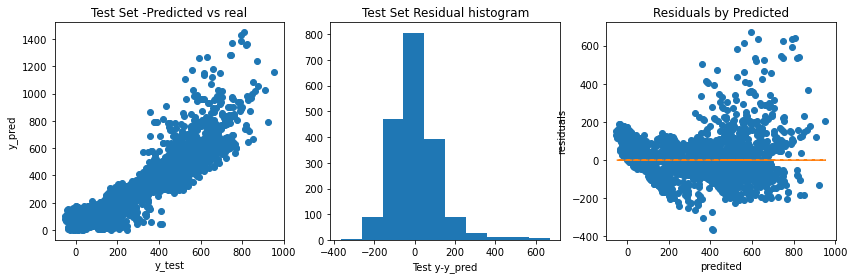

In [2146]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


## Evaluating predictions<a class="anchor" id="chapter17_2"></a>

In [2147]:
# mean absolute error
print('The mean absolute error (MAE) of the model is: ',mae(y_test, y_pred))

The mean absolute error (MAE) of the model is:  84.15728456043058


In [2148]:
# mean squared error
print('The mean square error (MSE) of the model is: ',mse(y_test, y_pred))

The mean square error (MSE) of the model is:  13771.20816647185


In [2149]:
# root mean squared error
rms = np.sqrt(mse(y_test, y_pred))
print('The mean root square error (RMSE) of the model is: ', rms)

The mean root square error (RMSE) of the model is:  117.35079107731592


In [2150]:
# R2 score
print('The coefficient of determination (R^2) of the model is: ',r2_score(y_test, y_pred))

The coefficient of determination (R^2) of the model is:  0.7493317555707995


In [2151]:
Adj_R2= 1 - (1-(r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('The adjusted coefficient of determination (Adj_R^2) of the model is: ',Adj_R2)

The adjusted coefficient of determination (Adj_R^2) of the model is:  0.7955148898675006


### Feature Importance

In [2152]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [2153]:
features_importances

,Attribute,Importance
88,policy_Personal L3,1.681725e+14
82,policy type_personal auto,1.514521e+14
87,policy_Personal L2,1.462022e+14
83,policy type_special auto,1.316150e+14
86,policy_Personal L1,1.197045e+14
...,...,...
15,effective to date_1/10/11,6.414951e-02
80,marital status_Married,3.255615e-02
36,effective to date_1/3/11,2.857053e-02
99,vehicle class_luxury suv,1.332268e-15


## Using Statsmodels for linear regression mode<a class="anchor" id="chapter19"></a>
- on StandardScaled Data

In [2154]:
import statsmodels.api as sm

In [2155]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:10:15   Log-Likelihood:                -47293.
No. Observations:                7651   AIC:                         9.480e+04
Df Residuals:                    7543   BIC:                         9.555e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        402.2020      1.347    298.524      0.0

## Using Seaborn for linear regression model<a class="anchor" id="chapter20"></a>

In [2156]:
y_test

2293     552.000000
1612     547.200000
4644     372.652536
4707     123.790553
6136      64.977867
            ...    
10379    276.877348
3947     398.502948
5037     312.000000
9714     178.006524
605      403.200000
Name: total claim amount, Length: 1913, dtype: float64

In [2157]:
#y_pred.tolist()

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

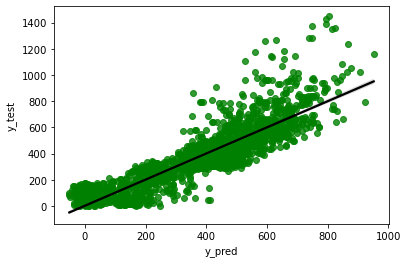

In [2158]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"})